### For Proplem 1 , we Load the data, try different random states for train test split and avergae the accuracy, Report what happens
### while proplem 2 , we do the same but we normalize the data first and report the outcome. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
data = pd.read_csv('data.txt', sep=" ", header=None)
column_names = []
for i in range(1,25):
    column_names.append("f_{}".format(i))
column_names.append("target")


In [ ]:
from sklearn.model_selection import KFold
from operator import itemgetter
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
for train_idx,test_idx in kfold.split(data):
    training = data.iloc[train_idx,0:-1]
    validation = data.iloc[test_idx,0:-1]
train_labels = list(itemgetter(*train_idx)(data.iloc[:,-1]))

In [ ]:
from sklearn import svm
from operator import itemgetter
from sklearn.metrics import confusion_matrix
acc = np.empty(10)
acc_norm = np.empty(10)
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1],data.iloc[:,-1], test_size=0.40, random_state=i)
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    svm_clf = svm.SVC(kernel='linear')
    svm_clf.fit(X_train, y_train)
    pred_labels = svm_clf.predict(X_test)
    TN, FP, FN, TP =confusion_matrix(y_test,pred_labels).ravel()
    acc[i] =  (TP+TN) /(TP+FP+TN+FN)
    #Normalize X-train and X-test then repeat learning and testing:
    
    for feature in range(X_train.shape[1]):
        X_train[:,feature] = (X_train[:,feature] - np.min(X_train[:,feature]))/(np.max(X_train[:,feature])-np.min(X_train[:,feature]))
        X_test[:,feature] =(X_test[:,feature] - np.min(X_test[:,feature]))/(np.max(X_test[:,feature])-np.min(X_test[:,feature]))

    norm_svm_clf = svm.SVC(kernel='linear')
    norm_svm_clf.fit(X_train, y_train)
    pred_labels = norm_svm_clf.predict(X_test)
    TN, FP, FN, TP =confusion_matrix(y_test,pred_labels).ravel()
    acc_norm[i] =  (TP+TN) /(TP+FP+TN+FN)
averaged_Acc = np.average(acc)
norm_averaged_Acc = np.average(acc_norm)
print(averaged_Acc," ", norm_averaged_Acc)

## A.  Report the Difference between the dataset used in (1) and those used in (2)
### data set used in 1 is not normalized, so features may have any range of values. while in 2, normalization ensures that all features in train and test data are both in the range 0 to 1.

## B. Report the averaged accuracy over the ten trails. 
### for 1 the averaged accuracy is 74.56 while in 2 the accuracy is 70.3

## C. Discuss the difference in the averaged accuracy of (1) and (2).
### the scaling that was done to the features surely affects the position of the points in the n dimensional space , hence changes the line that best seperates the data, and changes accuracy.

## D. Report all the preprocessing steps you did to the data.
### 1- splitting the data to train and test with different random state each time. 
### 2- normalization so that all features range from 0 to 1. 

# SVM Implementation from Scratch


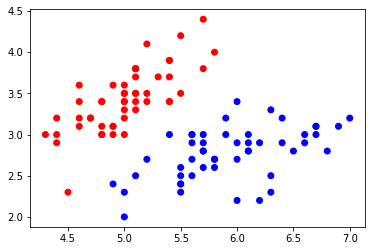

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import datasets

dataset= datasets.load_iris()
features = dataset.data[:,:2]
labels = dataset.target
#drop one class from the three
new_labels = labels[np.logical_or(labels==0,labels==1)]
features = features[np.logical_or(labels==0,labels==1),:]
plt.scatter(features[:,0],features[:,1],c=new_labels, cmap=colors.ListedColormap(['red','blue'])) #Visualize to see if the two classes are linearly separable
from sklearn.model_selection import train_test_split
new_labels[new_labels == 0] = -1 # so that labels are -1 and 1 (different signs)
X_train,X_test,y_train,y_test = train_test_split(features,new_labels,test_size=0.2,shuffle=True,random_state=42)



In [86]:
def fit(X,y,C,numiterations):
    w = np.ones(X.shape[1])
    b = 0

    for iteration in range(numiterations):
        for row in range(X.shape[0]):
            if ((y[row] * hypothesis(X[row],w,b)) >=1): 
                w = w - 0.01*2*C*w
            else:
                w = w - 0.01*(2*C*w - X[row].dot(y[row]))
                b = b- 0.01 * y[row]
    return w,b


def hypothesis(X,w,b):
    return X.dot(w) - b
def predict(X,w,b):
    return np.sign(hypothesis(X,w,b))

w,b = fit(X_train,y_train,0.1,1000)
predicted_labels = predict(X_test,w,b)

In [87]:
from sklearn.metrics import confusion_matrix
TN, FP, FN, TP = confusion_matrix(y_test, predicted_labels).ravel()
acc =  (TP+TN) /(TP+FP+TN+FN)
print(acc)

1.0


In [88]:
#Test the SVM model from Sklearn
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
pred_labels = svm_clf.predict(X_test)
TN, FP, FN, TP =confusion_matrix(y_test,pred_labels).ravel()
acc =  (TP+TN) /(TP+FP+TN+FN)
print(acc)

1.0
